In [1]:
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import get_db_url

In [2]:
from sklearn.cluster import KMeans
import prepare 

In [3]:
df = prepare.wrangle_zillow()

In [4]:
df.shape

(53749, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53749 entries, 0 to 53748
Data columns (total 33 columns):
propertylandusetypeid           53749 non-null object
parcelid                        53749 non-null object
id                              53749 non-null object
bathroomcnt                     53749 non-null float64
bedroomcnt                      53749 non-null float64
buildingqualitytypeid           53749 non-null float64
calculatedfinishedsquarefeet    53749 non-null float64
finishedsquarefeet12            53749 non-null float64
fips                            53749 non-null int64
latitude                        53749 non-null object
longitude                       53749 non-null object
lotsizesquarefeet               53749 non-null float64
propertycountylandusecode       53749 non-null object
rawcensustractandblock          53749 non-null float64
regionidcity                    53749 non-null float64
regionidcounty                  53749 non-null object
regionidzip         

In [6]:
df.head(3)

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county
0,261,17052889,1387261,1.0,2.0,8.0,1465.0,1465.0,6111,3.44493e+07,...,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,None,Single Family Residential,CA,Ventura County
1,266,17143294,1447245,2.0,3.0,8.0,1492.0,1492.0,6111,3.423e+07,...,132424.0,3508.10,6.111005e+13,5,-0.020526,2017-01-01,None,Condominium,CA,Ventura County
2,261,17110996,43675,2.5,3.0,8.0,1371.0,1371.0,6111,3.42382e+07,...,99028.0,2204.84,6.111005e+13,15,0.008669,2017-01-02,None,Single Family Residential,CA,Ventura County


In [7]:
continuous_data = df.select_dtypes(include=["int", "float"])

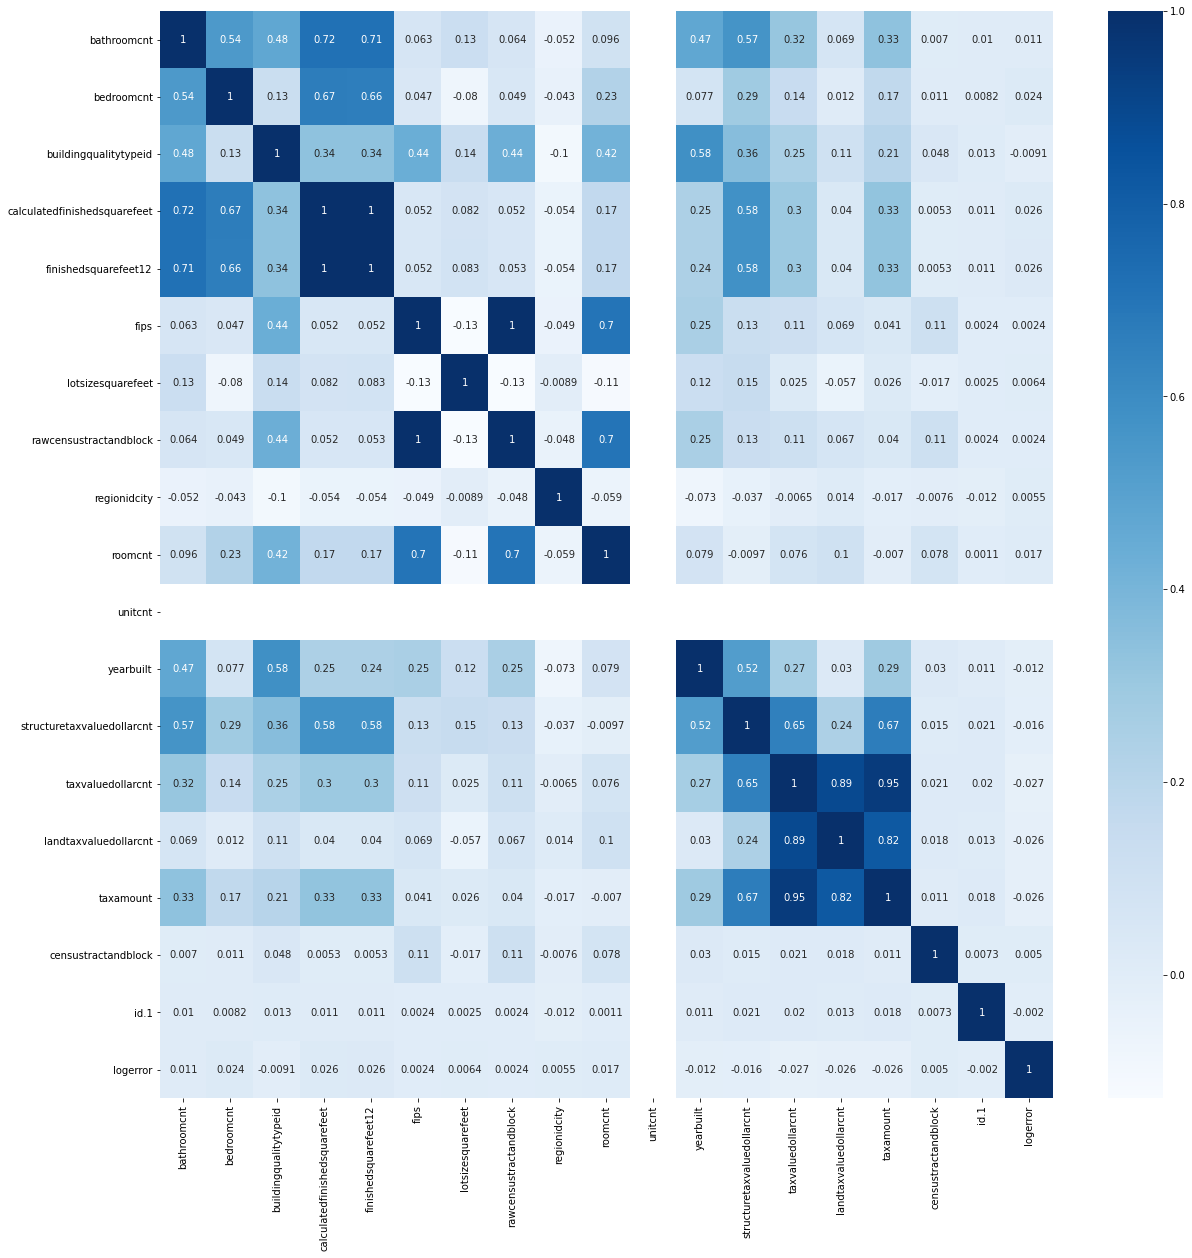

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(continuous_data.corr(), cmap='Blues', annot=True)
#plt.ylim(0, 4)

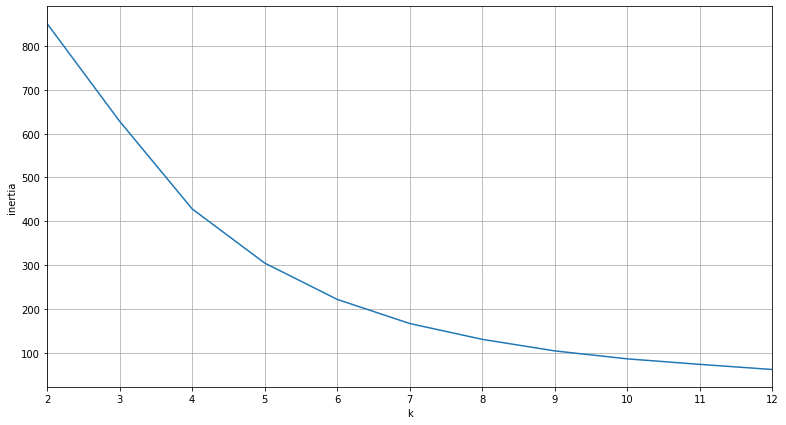

In [9]:
X = df[['logerror']]

def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [10]:
kmeans = KMeans(5).fit(X)
df['cluster_target'] = kmeans.labels_
df.cluster_target = 'cluster_target' + df.cluster_target.astype(str)

In [11]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,logerror
0,0.010151
1,1.698717
2,0.335523
3,-0.189356
4,-2.335640


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f09b7d0>]],
      dtype=object)

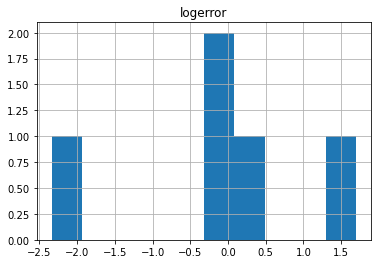

In [12]:
centroids.hist()

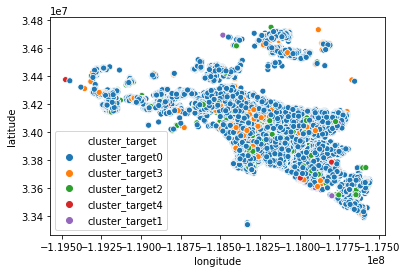

In [13]:
sns.scatterplot(x='longitude', y='latitude',hue="cluster_target", data=df)
plt.show()

Takeaway: It seems vast majority data points' logerror fell into cluster0 which has the lowest log error.

In [14]:
X = df[['latitude', 'longitude', 'finishedsquarefeet12']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.predict(X)

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [15]:
# Check for the coordinates of the centroids
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

,latitude,longitude,finishedsquarefeet12
0,3.394422e+07,-1.180796e+08,1445.500141
1,3.423790e+07,-1.190123e+08,1653.708742
2,3.418577e+07,-1.184432e+08,1595.786356
3,3.367977e+07,-1.177823e+08,1561.865346
4,3.463165e+07,-1.181265e+08,1837.228166


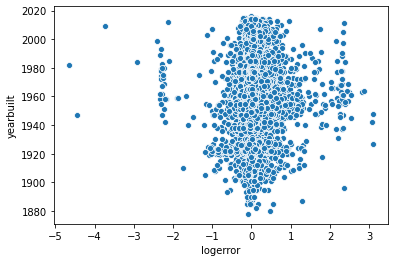

In [16]:
sns.scatterplot(x='logerror',y='yearbuilt', data = df)

In [17]:
X = df[['latitude', 'longitude','finishedsquarefeet12']]

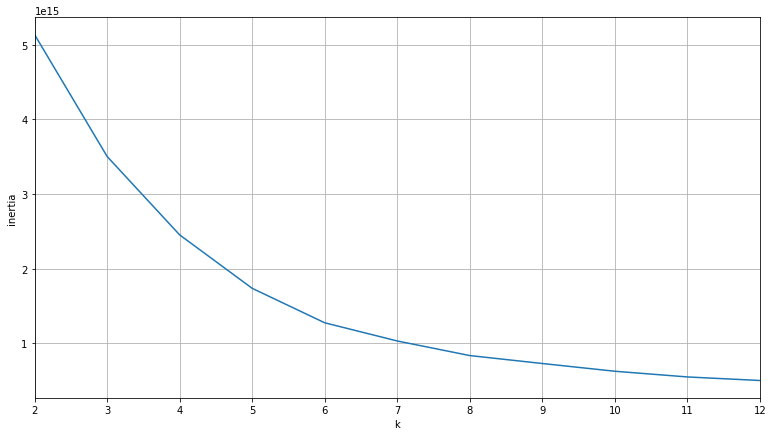

In [18]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [19]:
kmeans = KMeans(5)
kmeans.fit(X)
kmeans.predict(X)

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [20]:
df['home_age'] = 2017 - df.yearbuilt

In [21]:
df.head()

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county,cluster_target,home_age
0,261,17052889,1387261,1.0,2.0,8.0,1465.0,1465.0,6111,3.44493e+07,...,6.111001e+13,1,0.055619,2017-01-01,None,Single Family Residential,CA,Ventura County,cluster_target0,50.0
1,266,17143294,1447245,2.0,3.0,8.0,1492.0,1492.0,6111,3.423e+07,...,6.111005e+13,5,-0.020526,2017-01-01,None,Condominium,CA,Ventura County,cluster_target0,35.0
2,261,17110996,43675,2.5,3.0,8.0,1371.0,1371.0,6111,3.42382e+07,...,6.111005e+13,15,0.008669,2017-01-02,None,Single Family Residential,CA,Ventura County,cluster_target0,13.0
3,266,17153706,1431120,2.5,2.0,8.0,1442.0,1442.0,6111,3.41893e+07,...,6.111004e+13,80,0.027817,2017-01-02,None,Condominium,CA,Ventura County,cluster_target0,10.0
4,266,17229300,1969702,2.5,2.0,8.0,1164.0,1164.0,6111,3.42812e+07,...,6.111008e+13,89,-0.017684,2017-01-02,None,Condominium,CA,Ventura County,cluster_target0,32.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Let's scale the numeric columns
scaler = MinMaxScaler()
numeric_columns = list(df.select_dtypes('number').columns)
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [24]:
df.head()

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county,cluster_target,home_age
0,261,17052889,1387261,0.111111,0.181818,0.636364,0.170492,0.170492,1.0,3.44493e+07,...,0.001748,0.000000,0.607380,2017-01-01,None,Single Family Residential,CA,Ventura County,cluster_target0,0.355072
1,266,17143294,1447245,0.222222,0.272727,0.636364,0.173935,0.173935,1.0,3.423e+07,...,0.001749,0.000052,0.597562,2017-01-01,None,Condominium,CA,Ventura County,cluster_target0,0.246377
2,261,17110996,43675,0.277778,0.272727,0.636364,0.158505,0.158505,1.0,3.42382e+07,...,0.001749,0.000180,0.601327,2017-01-02,None,Single Family Residential,CA,Ventura County,cluster_target0,0.086957
3,266,17153706,1431120,0.277778,0.181818,0.636364,0.167559,0.167559,1.0,3.41893e+07,...,0.001749,0.001018,0.603795,2017-01-02,None,Condominium,CA,Ventura County,cluster_target0,0.065217
4,266,17229300,1969702,0.277778,0.181818,0.636364,0.132109,0.132109,1.0,3.42812e+07,...,0.001749,0.001134,0.597929,2017-01-02,None,Condominium,CA,Ventura County,cluster_target0,0.224638


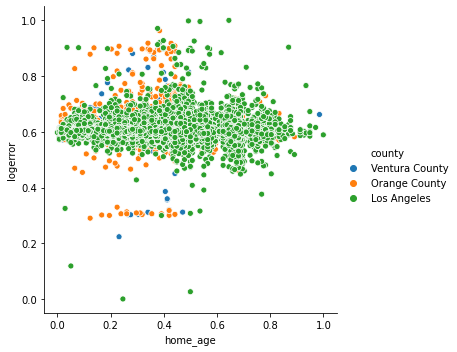

In [25]:
sns.relplot(x="home_age", y="logerror", hue = 'county',data=df)

Takeway: Houses in Orange County and Ventura county have relative younger ages, and higher logerror deviations.

In [26]:
import scipy.stats as stats

In [27]:
la = df[df.county == "Los Angeles"]
orange = df[df.county == "Orange County"]
ventura = df[df.county == "Ventura County"]

In [28]:
orange.head()

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county,cluster_target,home_age
4705,261,14186244,11677,0.222222,0.272727,0.636364,0.142183,0.142183,0.297297,3.38862e+07,...,0.000519,0.000013,0.600903,2017-01-01,None,Single Family Residential,CA,Orange County,cluster_target0,0.391304
4706,266,14705431,2116302,0.277778,0.272727,0.636364,0.154170,0.154170,0.297297,3.36637e+07,...,0.000520,0.000142,0.596491,2017-01-02,None,Condominium,CA,Orange County,cluster_target0,0.195652
4707,261,13944538,249412,0.277778,0.272727,0.636364,0.154552,0.154552,0.297297,3.37714e+07,...,0.000520,0.000155,0.606088,2017-01-02,None,Single Family Residential,CA,Orange County,cluster_target0,0.260870
4708,266,14731691,2205733,0.222222,0.181818,0.636364,0.107371,0.107371,0.297297,3.37156e+07,...,0.000520,0.000167,0.599057,2017-01-02,None,Condominium,CA,Orange County,cluster_target0,0.195652
4709,261,14375300,1548721,0.222222,0.363636,0.636364,0.197526,0.197526,0.297297,3.36428e+07,...,0.000519,0.000193,0.597386,2017-01-02,None,Single Family Residential,CA,Orange County,cluster_target0,0.253623


## Hypothesis Testing 
### T-Test
$H_0$: There is no difference of Logerror between LA County and Orange County.

$H_a$: There is a difference of Logerror between LA County and Orange County.

In [29]:
alpha = .01 # confidence level of .99

t, p = stats.ttest_ind(la.logerror, orange.logerror)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Failed to reject the null hypothesis


In [30]:
p

0.1925589744753555

$H_0$: There is no difference of Logerror between LA County and Ventura County.

$H_a$: There is a difference of Logerror between LA County and Ventura County.

In [31]:
alpha = .01 

t, p = stats.ttest_ind(la.logerror, ventura.logerror)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Failed to reject the null hypothesis


In [32]:
p

0.8259013748159818

$H_0$: There is no difference of Logerror between Orange County and Ventura County.

$H_a$: There is a difference of Logerror between Orange County and Ventura County.

In [33]:
alpha = .01 

t, p = stats.ttest_ind(orange.logerror, ventura.logerror)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Failed to reject the null hypothesis


In [34]:
p

0.5892719213656056

Insights drawn from the above visualization and hypothesis testing, through visualization, we though there's a difference among different counties in regard to logerror, after we did hypothesis testing, we failed to reject the null hypothesises, which means there is no statistic significant difference of logerrors between LA, Orange and Ventura County. 

In [35]:
# create taxrate variable
df['taxrate'] = (df.taxamount/df.taxvaluedollarcnt).round(4)

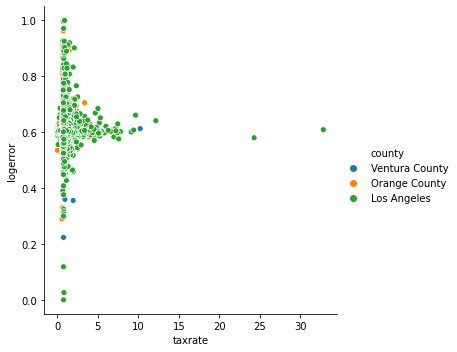

In [36]:
sns.relplot(x="taxrate", y="logerror", hue = 'county',data=df)

No insights drawn from the above chart, seems taxrate 

In [37]:
df.taxrate.isnull().sum() ==0

True

In [38]:
df.logerror.isnull().sum() ==0

True

In [39]:
print(df.taxrate)

0        0.7544
1        0.6543
2        0.6897
3        0.8723
4        0.6786
          ...  
53744    0.8770
53745    0.7443
53746    1.1378
53747    0.7465
53748    0.7986
Name: taxrate, Length: 53749, dtype: float64


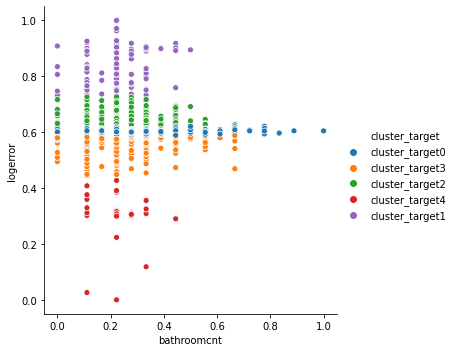

In [40]:
sns.relplot(x="bathroomcnt", y="logerror", hue='cluster_target',data=df);

In [41]:
alpha = 0.05
r, p = stats.pearsonr(df.bathroomcnt, df.logerror)
r, p

(0.010710212956260866, 0.013026240411187901)

In [42]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null")

Reject the null hypothesis


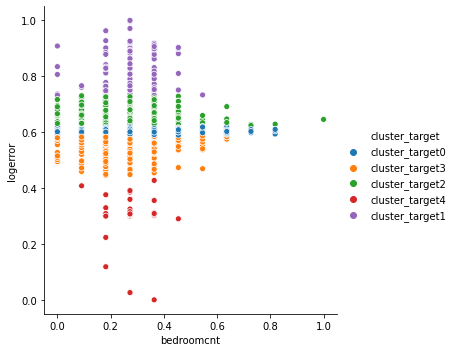

In [43]:
sns.relplot(x="bedroomcnt", y="logerror",hue='cluster_target', data=df);

In [44]:
alpha = 0.05
r, p = stats.pearsonr(df.bedroomcnt, df.logerror)
r, p

(0.023825964569162784, 3.3056273842039224e-08)

In [45]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null")

Reject the null hypothesis


# Modeling

In [46]:
df.head(3)

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county,cluster_target,home_age,taxrate
0,261,17052889,1387261,0.111111,0.181818,0.636364,0.170492,0.170492,1.0,3.44493e+07,...,0.000000,0.607380,2017-01-01,None,Single Family Residential,CA,Ventura County,cluster_target0,0.355072,0.7544
1,266,17143294,1447245,0.222222,0.272727,0.636364,0.173935,0.173935,1.0,3.423e+07,...,0.000052,0.597562,2017-01-01,None,Condominium,CA,Ventura County,cluster_target0,0.246377,0.6543
2,261,17110996,43675,0.277778,0.272727,0.636364,0.158505,0.158505,1.0,3.42382e+07,...,0.000180,0.601327,2017-01-02,None,Single Family Residential,CA,Ventura County,cluster_target0,0.086957,0.6897


In [47]:
df.logerror.mean()

0.6022622528675683

In [48]:
df = prepare.split_data(df)

In [49]:
train, validate, test = df

In [50]:
train.head()

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county,cluster_target,home_age,taxrate
34772,261,12563802,2662341,0.111111,0.363636,0.272727,0.164626,0.164626,0.0,3.38775e+07,...,0.424187,0.600414,2017-05-04,Floor/Wall,Single Family Residential,CA,Los Angeles,cluster_target0,0.557971,0.7612
30767,266,11593354,2375485,0.222222,0.181818,0.636364,0.121015,0.121015,0.0,3.40186e+07,...,0.302943,0.600773,2017-04-04,Central,Condominium,CA,Los Angeles,cluster_target0,0.376812,0.7511
32136,261,11232887,2281132,0.333333,0.363636,0.636364,0.294185,0.294185,0.0,3.45441e+07,...,0.345166,0.599290,2017-04-14,Central,Single Family Residential,CA,Los Angeles,cluster_target0,0.072464,1.3326
38218,261,12700935,1350860,0.222222,0.181818,0.636364,0.175976,0.175976,0.0,3.3723e+07,...,0.531000,0.595146,2017-05-31,Central,Single Family Residential,CA,Los Angeles,cluster_target0,0.456522,0.8352
23661,261,12952544,2902335,0.222222,0.454545,0.454545,0.199056,0.199056,0.0,3.40628e+07,...,0.092344,0.625131,2017-02-01,Floor/Wall,Single Family Residential,CA,Los Angeles,cluster_target2,0.456522,0.7042


In [51]:
predictions = pd.DataFrame({
    'actual_logerror': train.logerror
})
predictions.head()

,actual_logerror
34772,0.600414
30767,0.600773
32136,0.599290
38218,0.595146
23661,0.625131


In [52]:
predictions['baseline'] = predictions.actual_logerror.mean()
predictions.head(3)


,actual_logerror,baseline
34772,0.600414,0.602218
30767,0.600773,0.602218
32136,0.599290,0.602218


In [57]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt

In [69]:
MSE_baseline = mean_squared_error(predictions.actual_logerror, predictions.baseline)
RMSE_baseline = sqrt(MSE_baseline)
print('RMSE_baseline:', RMSE_baseline)

RMSE_baseline: 0.019929162577081768


## Model 1

- Linear regression model with features

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32249 entries, 34772 to 35097
Data columns (total 35 columns):
propertylandusetypeid           32249 non-null object
parcelid                        32249 non-null object
id                              32249 non-null object
bathroomcnt                     32249 non-null float64
bedroomcnt                      32249 non-null float64
buildingqualitytypeid           32249 non-null float64
calculatedfinishedsquarefeet    32249 non-null float64
finishedsquarefeet12            32249 non-null float64
fips                            32249 non-null float64
latitude                        32249 non-null object
longitude                       32249 non-null object
lotsizesquarefeet               32249 non-null float64
propertycountylandusecode       32249 non-null object
rawcensustractandblock          32249 non-null float64
regionidcity                    32249 non-null float64
regionidcounty                  32249 non-null object
regionidzip   

In [64]:
X_train.head(1)

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,...,censustractandblock,id.1,transactiondate,heatingorsystemdesc,propertylandusedesc,state,county,cluster_target,home_age,taxrate
34772,261,12563802,2662341,0.111111,0.363636,0.272727,0.164626,0.164626,0.0,3.38775e+07,...,0.000011,0.424187,2017-05-04,Floor/Wall,Single Family Residential,CA,Los Angeles,cluster_target0,0.557971,0.7612


In [66]:
X_train = train[['bathroomcnt','bedroomcnt','finishedsquarefeet12']]

In [67]:
y_train = train.logerror

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

array([0.60246385, 0.60162604, 0.60307472, ..., 0.60287372, 0.60175224,
       0.60205396])

In [ ]:
lm1=LinearRegression()
lm1.fit(X_train, y_train)
yhat_lm1=lm1.predict(X_train)
yhat_lm1

In [71]:
MSE_1 = mean_squared_error(yhat_lm1, y_train)
RMSE_1 = sqrt(MSE_1)
print('RMSE_1:' ,RMSE_1)

RMSE: 0.01992051654688105


In [73]:
RMSE_baseline < RMSE_1

False

In [78]:
tree = DecisionTreeRegressor(max_depth = 6, random_state = 123)
tree.fit(X_train, y_train)
y_pred_t = tree.predict(X_train)

In [79]:
MSE_2 = mean_squared_error(y_train, y_pred_t)
RMSE_2 = sqrt(MSE_2)
print('RMSE_2:',RMSE_2)

RMSE_2: 0.019664423444093974


In [80]:
forest = RandomForestRegressor(max_depth = 8, random_state = 123).fit(X_train, y_train)
y_pred_for = forest.predict(X_train)

In [81]:
MSE_3 = mean_squared_error(y_train, y_pred_for)
RMSE_3 = sqrt(MSE_3)
print('RMSE_3:',RMSE_3)

RMSE_3: 0.01923212963952115


In [90]:
X_train = train[['bathroomcnt','bedroomcnt','finishedsquarefeet12','home_age','taxvaluedollarcnt']]

In [91]:
y_train = train.logerror

In [92]:
forest = RandomForestRegressor(max_depth = 8, random_state = 123).fit(X_train, y_train)
y_pred_for = forest.predict(X_train)

In [93]:
MSE_4 = mean_squared_error(y_train, y_pred_for)
RMSE_4 = sqrt(MSE_4)
print('RMSE_4:',RMSE_4)

RMSE_4: 0.01871589066843193


In [ ]:
X = train[['bathroomcnt','bedroomcnt','finishedsquarefeet12','home_age','taxvaluedollarcnt']]
y_train = train.logerror
forest = RandomForestRegressor(max_depth = 8, random_state = 123).fit(X_train, y_train)

y_validae = validate.logerror
y_validate_predicted = lm.predict(test[['bathroomcnt','bedroomcnt','sqft']])

test_data_mse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted)
test_data_mse